# Prediction Logitsitc Regresion
## Imports

In [1]:
from time import time
import psycopg2
from collections import Counter
import gc
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
np.set_printoptions(suppress=True,precision=10)
from sklearn.model_selection import train_test_split

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression
from Matrix import convert_matrix

In [42]:
def selectMatrix(with_pearson,len_words=3):
    table = convert_matrix(with_pearson=with_pearson,len_words=(len_words,len_words))
    subjects = table.index.levels[0].tolist()
    survived = table.index.labels[1].tolist()
    patients = table.values
    patients_train, patients_test,subject_train, subject_test,survived_train, survived_test = train_test_split(patients,subjects, 
                                                                               survived,test_size=0.2, random_state=42)
    model,accuracy_score,roc_auc = ajustLogisticRegression(patients_train,survived_train,patients_test,survived_test)
    regresion = model.predict_proba(patients_test)[:,1]
    print('accuracy_score',accuracy_score)
    return survived_test,regresion,roc_auc

In [35]:
def fillResults(test_values,len_words=3):
    nmfresults = []
    for i in test_values:
        survived_test,regresion,roc_auc = selectMatrix(i,len_words)
        nmfresults.append({'name':i, 'survived_test':survived_test,'regresion':regresion,'roc_auc':roc_auc})
    return nmfresults

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [29]:
def roc_curveplot(name,y_true,y_score,logit_roc_auc):
    fpr, tpr, thresholds = roc_curve(y_true,y_score)
    plt.plot(fpr,tpr,label='n= '+str(name)+' AUC =%0.3f' % logit_roc_auc)

In [36]:
fig_size = [6, 6]
plt.rcParams["figure.figsize"] = fig_size
def plotResult(nmfresult,size):
    plt.figure()
    for nmfresult in nmfresults:
        roc_curveplot(nmfresult['name'],nmfresult['survived_test'],nmfresult['regresion'],nmfresult['roc_auc'])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para regresiones usando '+str(size)+' clases')
    plt.legend(loc="lower right")
    plt.show()

(155, 1)
accuracy_score 0.903225806452
(468, 42)
accuracy_score 0.797872340426
(488, 84)
accuracy_score 0.714285714286
(563, 168)
accuracy_score 0.716814159292
(575, 252)
accuracy_score 0.686956521739
(577, 294)
accuracy_score 0.73275862069
(580, 336)
accuracy_score 0.706896551724


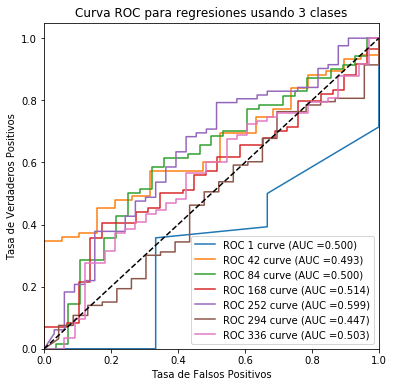

In [43]:
nmfresults = fillResults((1,42,84,168,252,294,336),3)
plotResult(nmfresults,3)

(513, 50)
accuracy_score 0.757281553398
(523, 100)
accuracy_score 0.647619047619
(536, 150)
accuracy_score 0.805555555556
(559, 200)
accuracy_score 0.732142857143
(560, 250)
accuracy_score 0.723214285714


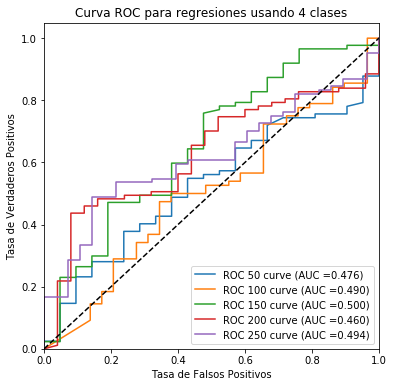

In [44]:
clases = 4
nmfresults = fillResults((50,100,150,200,250),clases)
plotResult(nmfresults,clases)

(507, 50)
accuracy_score 0.705882352941
(525, 100)
accuracy_score 0.742857142857
(532, 150)
accuracy_score 0.775700934579
(553, 200)
accuracy_score 0.774774774775
(556, 250)
accuracy_score 0.785714285714
(564, 400)
accuracy_score 0.769911504425


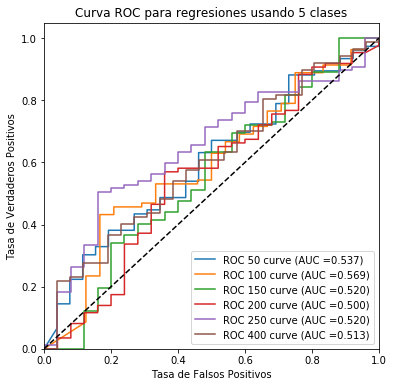

In [45]:
clases = 5
nmfresults = fillResults((50,100,150,200,250,400),clases)
plotResult(nmfresults,clases)

(498, 50)
accuracy_score 0.75
(532, 100)
accuracy_score 0.682242990654
(542, 150)
accuracy_score 0.752293577982
(555, 200)
accuracy_score 0.711711711712
(555, 250)
accuracy_score 0.693693693694
(564, 300)
accuracy_score 0.725663716814
(566, 400)
accuracy_score 0.754385964912


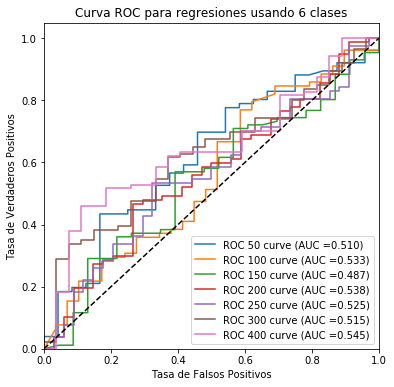

In [46]:
clases = 6
nmfresults = fillResults((50,100,150,200,250,300,400),clases)
plotResult(nmfresults,clases)

(475, 50)
accuracy_score 0.789473684211
(518, 100)
accuracy_score 0.740384615385
(533, 150)
accuracy_score 0.785046728972
(541, 200)
accuracy_score 0.752293577982
(545, 250)
accuracy_score 0.724770642202
(552, 300)
accuracy_score 0.792792792793
(555, 400)
accuracy_score 0.693693693694


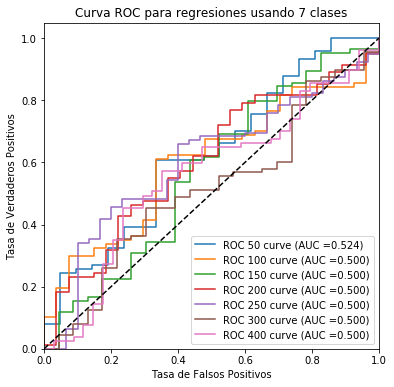

In [47]:
clases = 7
nmfresults = fillResults((50,100,150,200,250,300,400),clases)
plotResult(nmfresults,clases)

(457, 50)
accuracy_score 0.728260869565
(483, 100)
accuracy_score 0.762886597938
(512, 150)
accuracy_score 0.708737864078
(542, 200)
accuracy_score 0.807339449541
(547, 250)
accuracy_score 0.8
(552, 300)
accuracy_score 0.711711711712
(553, 400)
accuracy_score 0.711711711712


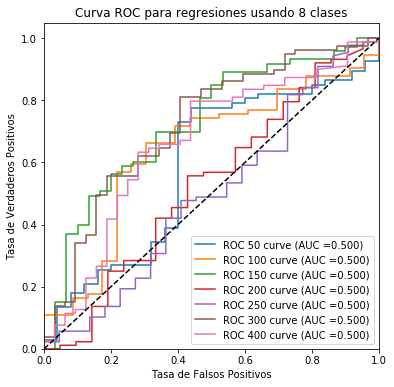

In [48]:
clases = 8
nmfresults = fillResults((50,100,150,200,250,300,400),clases)
plotResult(nmfresults,clases)